<a href="https://colab.research.google.com/github/ARJUN108-verma/Internship-at-Gudsky-Research-Foundation/blob/main/Statistical_Analysis_of_Real_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will discuss and analyse the data of titanik based on these question:-

1. What is the overall survival rate?
2. What is the gender distribution of passengers?
3. Did women have a higher survival rate than men?
4. How does survival vary by passenger class (Pclass)?
5. What was the average age of survivors vs non-survivors?
6. What is the age distribution of all passengers?
7. Did children (Age < 12) have better survival chances?
8. How does fare relate to survival?
9. Which passenger class paid the highest fares on average?
10. Was there a gender imbalance within each class?
11. Did larger families (SibSp + Parch) have higher/lower survival rates?
12. Which port of embarkation (C, Q, S) had the highest survival rate?
13. What correlations exist between numerical features and survival?
14. Was higher fare strongly linked with higher-class tickets and better survival?
15. Can we summarize the key survival factors?



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("/content/titanic.csv")

In [3]:
# Handle missing values
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-2037048109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
/tmp/ipython-input-2037048109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Q1: Survival Counts:
 Survived
0    549
1    342
Name: count, dtype: int64


/tmp/ipython-input-2129725086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=titanic, palette="Set2")


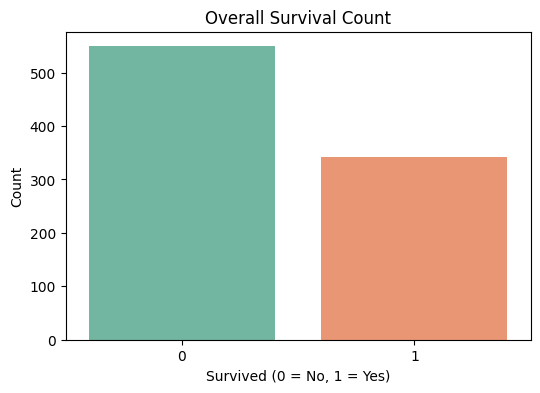

In [4]:
#01-What is the overall survival rate?
survival_counts = titanic["Survived"].value_counts()
print("Q1: Survival Counts:\n", survival_counts)

plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=titanic, palette="Set2")
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


Q2: Gender Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


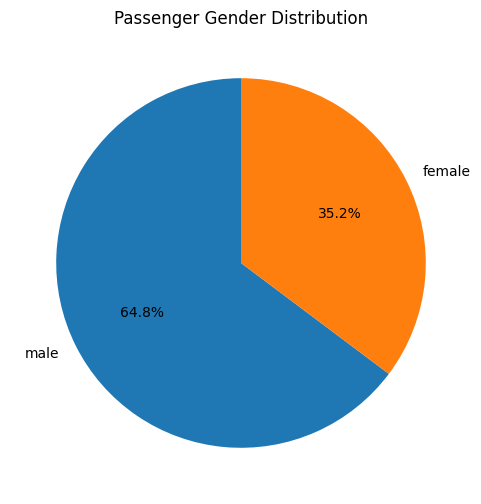

In [5]:
#02-What is the gender distribution of passengers?
gender_counts = titanic["Sex"].value_counts()
print("\nQ2: Gender Distribution:\n", gender_counts)

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Passenger Gender Distribution")
plt.show()


Q3: Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-2479491044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=titanic, palette="pastel")


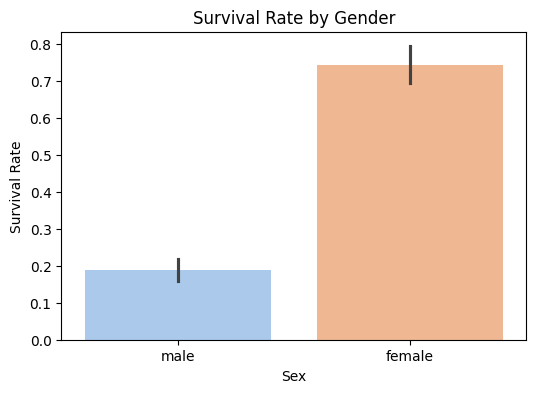

In [6]:
#03-Did women have a higher survival rate than men?
gender_survival = titanic.groupby("Sex")["Survived"].mean()
print("\nQ3: Survival Rate by Gender:\n", gender_survival)

plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=titanic, palette="pastel")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


Q4: Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


/tmp/ipython-input-3834297481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=titanic, palette="muted")


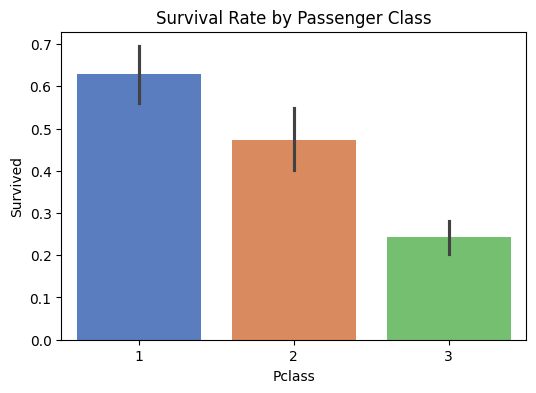

In [7]:
#04-How does survival vary by passenger class (Pclass)
class_survival = titanic.groupby("Pclass")["Survived"].mean()
print("\nQ4: Survival Rate by Class:\n", class_survival)

plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=titanic, palette="muted")
plt.title("Survival Rate by Passenger Class")
plt.show()


Q5: Average Age by Survival:
 Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


/tmp/ipython-input-1211403037.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=titanic, palette="Set3")


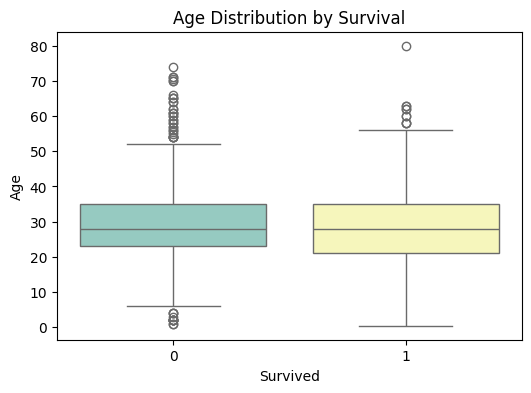

In [8]:
#05-What was the average age of survivors vs non-survivors?
age_comparison = titanic.groupby("Survived")["Age"].mean()
print("\nQ5: Average Age by Survival:\n", age_comparison)

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=titanic, palette="Set3")
plt.title("Age Distribution by Survival")
plt.show()

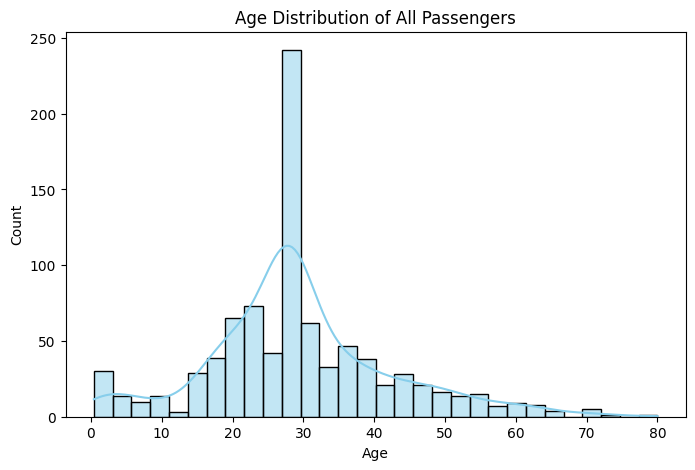

In [9]:
#06-What is the age distribution of all passengers?
plt.figure(figsize=(8,5))
sns.histplot(titanic["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of All Passengers")
plt.xlabel("Age")
plt.show()

In [11]:
#07-Did children (Age < 12) have better survival chances?
titanic["IsChild"] = titanic["Age"] < 12
child_survival = titanic.groupby("IsChild")["Survived"].mean()
print("\nQ7: Survival Rate (Children vs Adults):\n", child_survival)


Q7: Survival Rate (Children vs Adults):
 IsChild
False    0.368165
True     0.573529
Name: Survived, dtype: float64


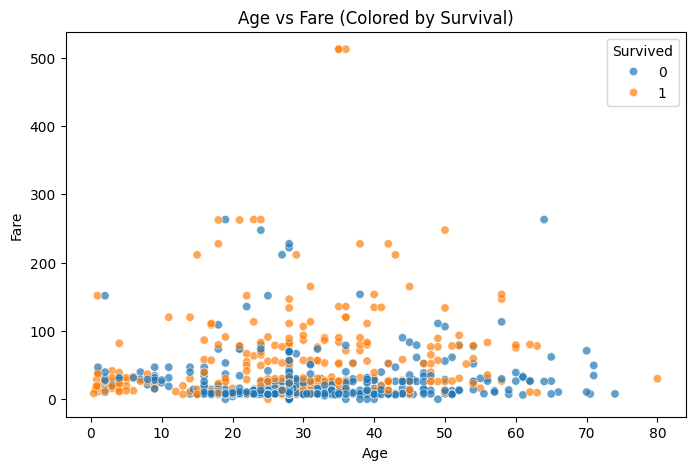

In [12]:
#08-How does fare relate to survival?
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic, alpha=0.7)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()


Q9: Average Fare by Class:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


/tmp/ipython-input-1010596156.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Fare", data=titanic, palette="coolwarm")


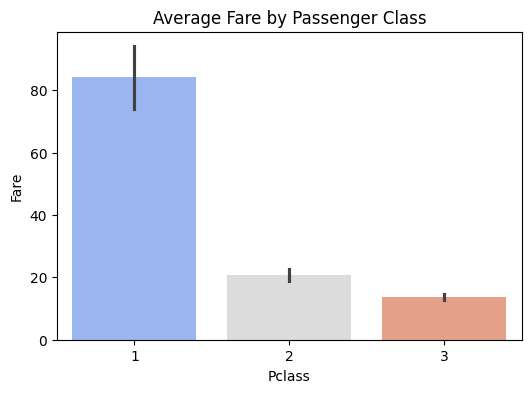

In [13]:
#09-Which passenger class paid the highest fares on average?
fare_class = titanic.groupby("Pclass")["Fare"].mean()
print("\nQ9: Average Fare by Class:\n", fare_class)

plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Fare", data=titanic, palette="coolwarm")
plt.title("Average Fare by Passenger Class")
plt.show()


Q10: Gender Counts per Class:
 Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


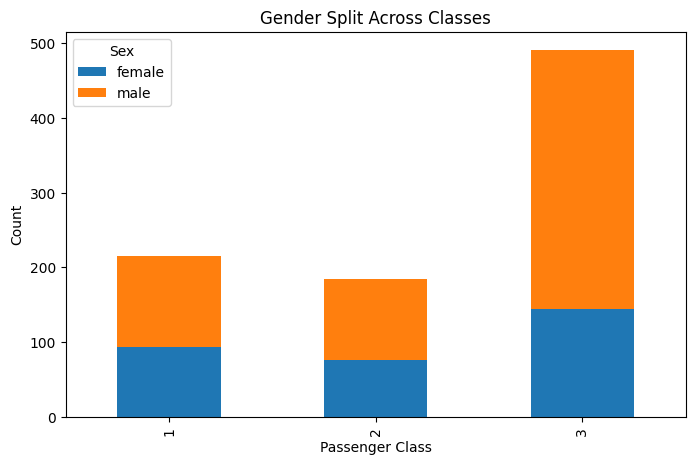

In [14]:
#10-Was there a gender imbalance within each class?
class_gender = titanic.groupby(["Pclass","Sex"]).size().unstack()
print("\nQ10: Gender Counts per Class:\n", class_gender)

class_gender.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Gender Split Across Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


Q11: Survival Rate by Family Size:
 FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


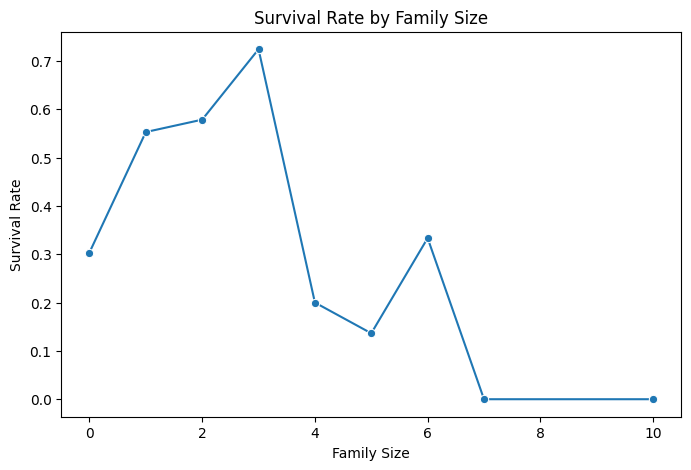

In [15]:
#11-Did larger families (SibSp + Parch) have higher/lower survival rates?
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
family_survival = titanic.groupby("FamilySize")["Survived"].mean()
print("\nQ11: Survival Rate by Family Size:\n", family_survival)

plt.figure(figsize=(8,5))
sns.lineplot(x=family_survival.index, y=family_survival.values, marker="o")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


Q12: Survival Rate by Embarked Port:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


/tmp/ipython-input-1631751737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=titanic, palette="Set1")


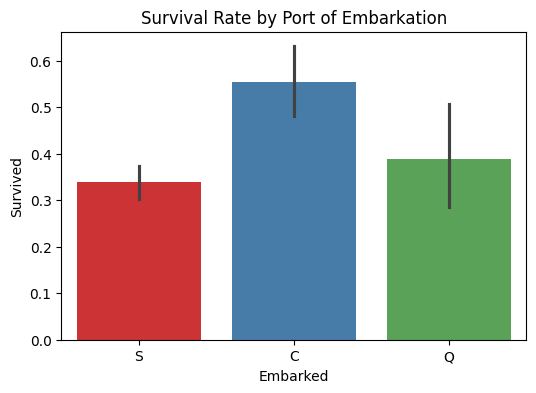

In [16]:
#12-Which port of embarkation (C, Q, S) had the highest survival rate?
embark_survival = titanic.groupby("Embarked")["Survived"].mean()
print("\nQ12: Survival Rate by Embarked Port:\n", embark_survival)

plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=titanic, palette="Set1")
plt.title("Survival Rate by Port of Embarkation")
plt.show()

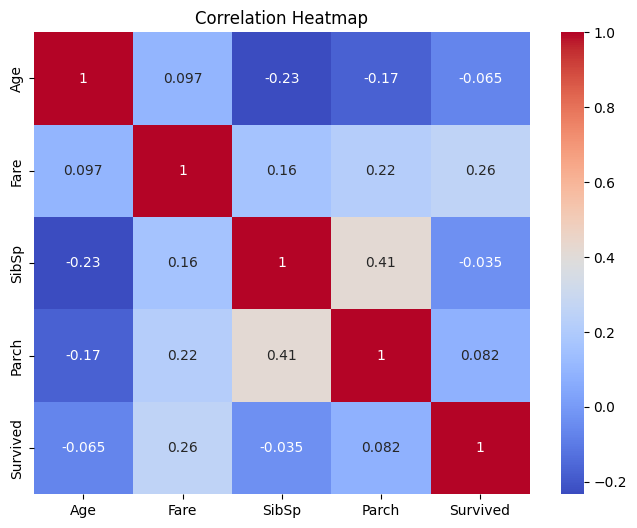

In [17]:
#13-What correlations exist between numerical features and survival?
plt.figure(figsize=(8,6))
corr = titanic[["Age","Fare","SibSp","Parch","Survived"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


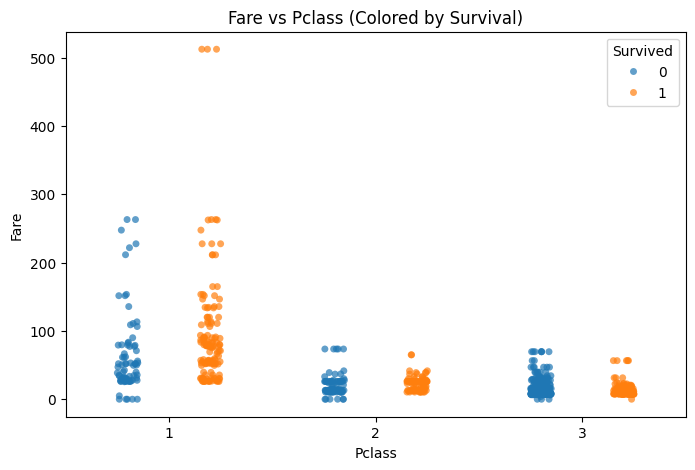

In [18]:
#14-Was higher fare strongly linked with higher-class tickets and better survival?
plt.figure(figsize=(8,5))
sns.stripplot(x="Pclass", y="Fare", hue="Survived", data=titanic, dodge=True, jitter=True, alpha=0.7)
plt.title("Fare vs Pclass (Colored by Survival)")
plt.show()

In [19]:
#15-Can we summarize the key survival factors?
print("\nQ15: Key Factors → Gender, Class, Age, Fare are most influential in determining survival.")


Q15: Key Factors → Gender, Class, Age, Fare are most influential in determining survival.
